# Zadanie 1b  
Celem ćwiczeń jest implementacja metody gradientu prostego.

Należy zaimplementować metodę gradientu prostego, służącą do znajdywania minimum lokalnego zadanej funkcji celu:

$$\theta_{t+1}=\theta_{t} - \eta\nabla f(\theta_{t})$$
gdzie:
- $f(\theta_{t})$ to funkcja celu dla której szukamy minimum,
- $\theta_{t}$ to parametry funkcji celu w kroku $t$,
- $\eta$ to współczynnik uczenia definiujący tempo zmiany parametrów (ang. learning rate), który powinien być skalarem o niskiej wartości.

W ćwiczeniu należy zaimplementować tę metodę do znalezienia minimów lokalnych dwóch funkcji (podanych poniżej). Dodatkowo należy przebadać wpływ współczynnika uczenia $\eta$  oraz różnych parametrów początkowych $\theta_{t=0}$ na jakość rozwiązania. Należy zwizualizować proces minimalizacji, czyli pośrednie parametry $\theta_{t}$ na wykresie 2D.

W poniższej implementacji należy uzpełnić metody klasy `SimpleGradientDescent` i użyć ich do realizacji zadania.    
  
## Punktacja:    
 - Implementacja kroku gradientu prostego. **1 pkt**  
 - Przeprowadzenie przeszukiwania minimum na obu funkcjach - poprawny wynik. **1 pkt**  
 - Wizualizacja przeszukiwania z wielu miejsc początkowych i dla różnych wartości $\eta$. **2 pkt**


In [1]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

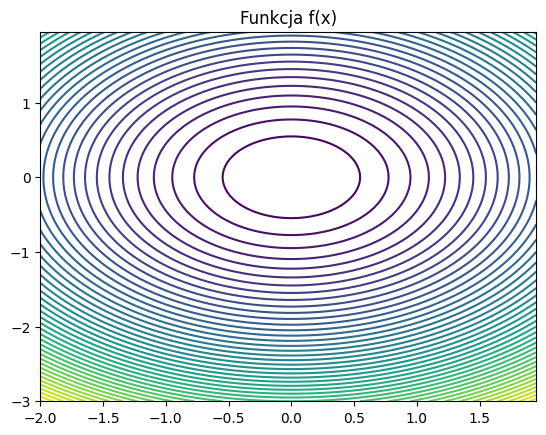

In [2]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.title("Funkcja f(x)")
plt.contour(X, Y, Z, 50)

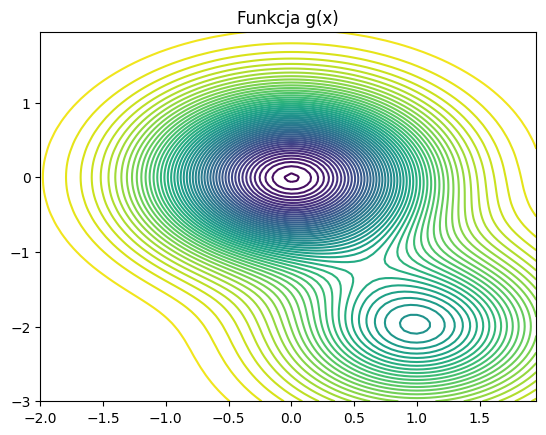

In [3]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = 1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("Funkcja g(x)")
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [ ]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(
        self,
        func: Callable[[float, float], float],
        grad_func: Callable[[float, float], Tuple[float, float]],
        alpha: float = 0.1,
    ):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10)
        plt.title(f'Alpha = {self.alpha}')
        plt.show()

    def calculate_func_value(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        x1_grad, x2_grad = self.calculate_func_grad(x1, x2)
        return(x1-self.alpha*x1_grad, x2-self.alpha*x2_grad)

    def minimize(
        self,
        x1_init: float,
        x2_init: float,
        steps: int,
        verbose: int = 0,
        plot: bool = False,
    ) -> float:
        x1, x2 = x1_init, x2_init
        self.trace = np.empty((0, 2))
        for i in range(steps):
            self.trace = np.vstack((self.trace, [x1, x2]))
            if(verbose>0):
                print(f"{i+1}: x1={x1}, x2={x2}, f(x1, x2)={self.calculate_func_value(x1, x2)}")
            x1, x2 = self.gradient_descent_step(x1, x2)
        if(plot):
            self.plot_func()
        minimum = self.calculate_func_value(x1, x2)

        return minimum

# Rozwiązanie

## Funkcja 1

3.25
(0.8, 1.2)
(2, 3.0)


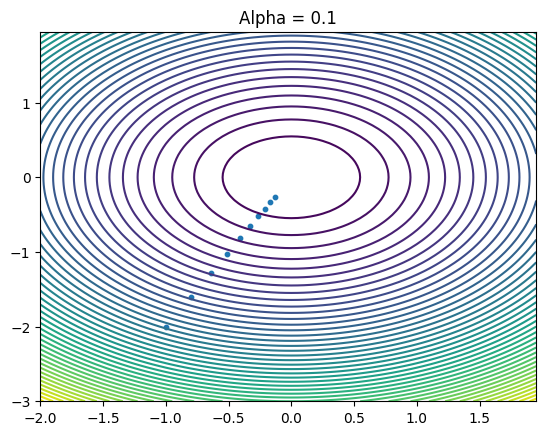

0.05764607523034238

3.25
(0.5, 0.75)
(2, 3.0)


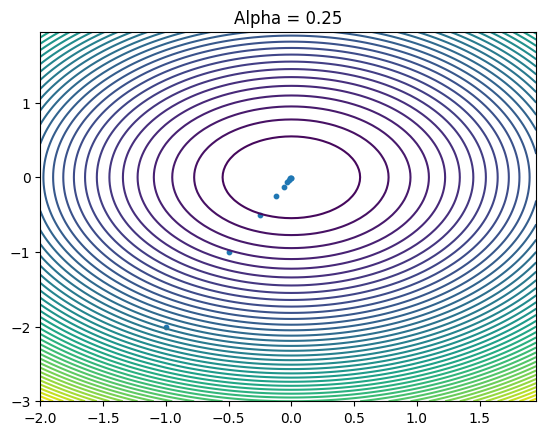

4.76837158203125e-06

3.25
(0.19999999999999996, 0.2999999999999998)
(2, 3.0)


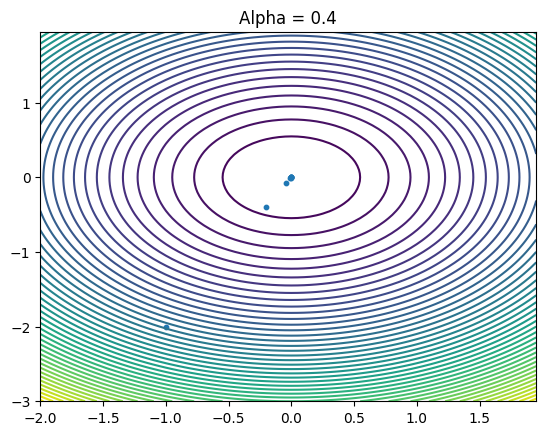

5.242879999999969e-14

3.25
(-0.10000000000000009, -0.15000000000000013)
(2, 3.0)


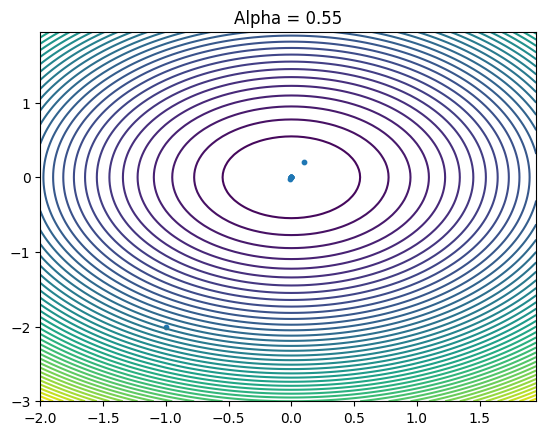

5.000000000000089e-20

3.25
(-0.40000000000000013, -0.6000000000000001)
(2, 3.0)


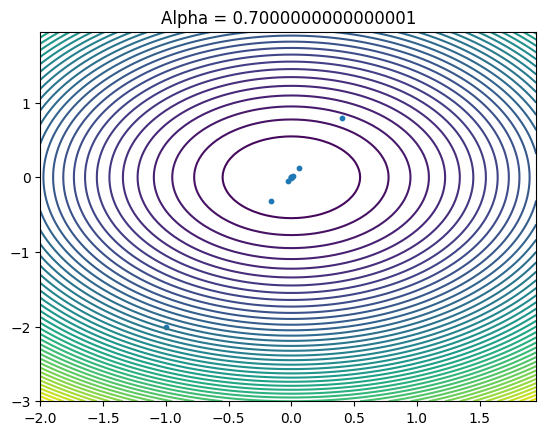

5.497558138880036e-08

3.25
(0.8, 1.2)
(2, 3.0)


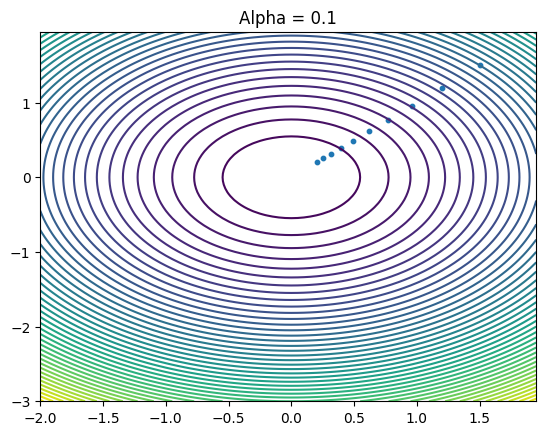

0.05188146770730813

3.25
(0.5, 0.75)
(2, 3.0)


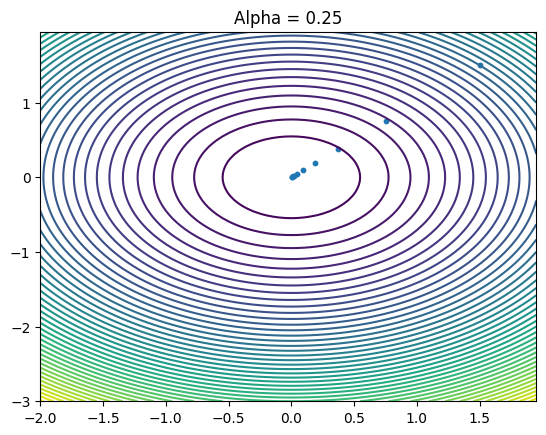

4.291534423828125e-06

3.25
(0.19999999999999996, 0.2999999999999998)
(2, 3.0)


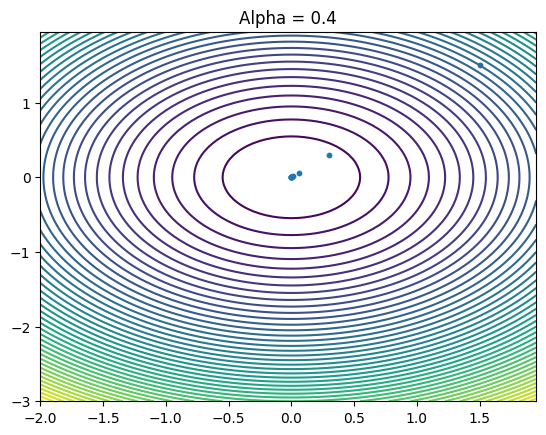

4.7185919999999736e-14

3.25
(-0.10000000000000009, -0.15000000000000013)
(2, 3.0)


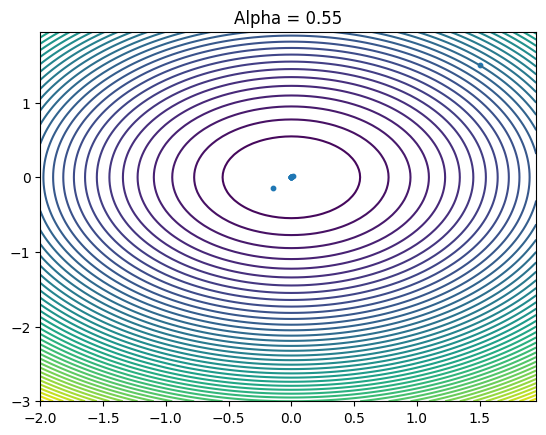

4.500000000000068e-20

3.25
(-0.40000000000000013, -0.6000000000000001)
(2, 3.0)


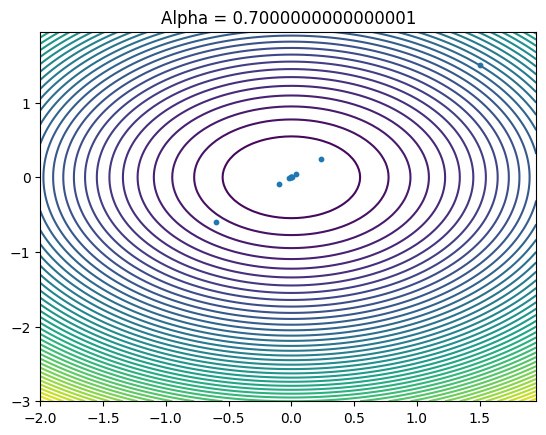

4.947802324992034e-08



In [5]:
def func1(X: float, Y: float) -> float:
    return X**2 + Y**2
def grad_func1(X: float, Y: float) -> Tuple[float, float]:
    return (2*X, 2*Y)

j=0.1
for i in range(5):
    SGD1 = SimpleGradientDescent(func1, grad_func1, j)
    print(SGD1.calculate_func_value(1, 1.5))
    print(SGD1.gradient_descent_step(1, 1.5))
    print(SGD1.calculate_func_grad(1, 1.5))
    print(SGD1.minimize(-1, -2, 10, 0, True))
    j+=0.15
    print()

j=0.1
for i in range(5):
    SGD1 = SimpleGradientDescent(func1, grad_func1, j)
    print(SGD1.calculate_func_value(1, 1.5))
    print(SGD1.gradient_descent_step(1, 1.5))
    print(SGD1.calculate_func_grad(1, 1.5))
    print(SGD1.minimize(1.5, 1.5, 10, 0, True))
    print()
    j+=0.15

## Funkcja 2

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.2135017140234744), np.float64(0.42656345220264746))


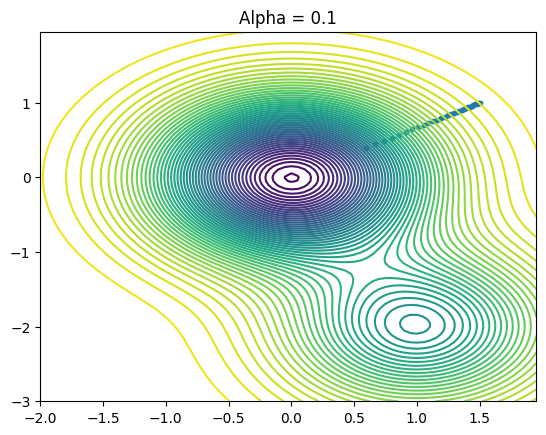

0.8261070320062567

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.15875428505868602), np.float64(0.3164086305066187))


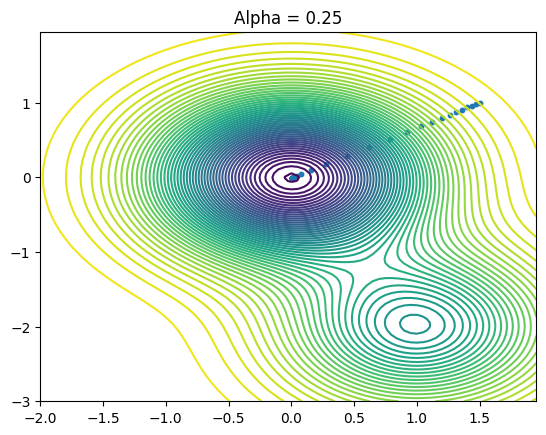

0.4965724837074988

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.10400685609389762), np.float64(0.20625380881058997))


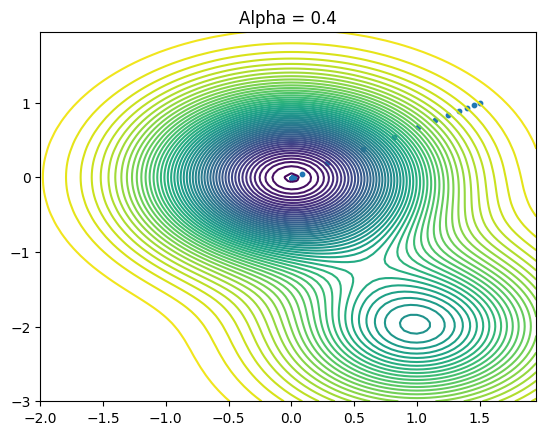

0.49657248367634166

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.049259427129109246), np.float64(0.09609898711456122))


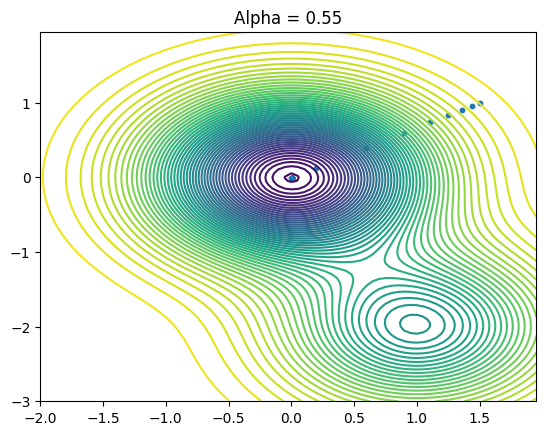

0.4965724836763416

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(-0.005488001835679157), np.float64(-0.01405583458146753))


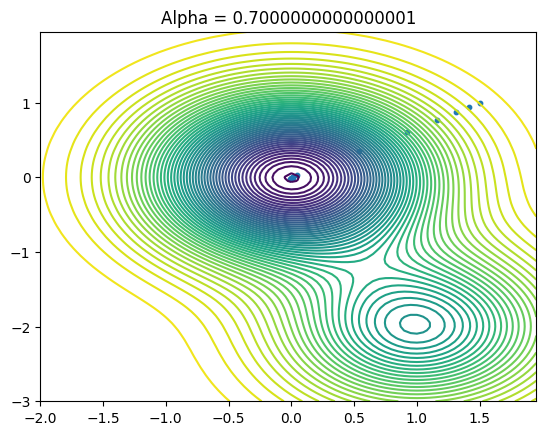

0.4965724836763416

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.2135017140234744), np.float64(0.42656345220264746))


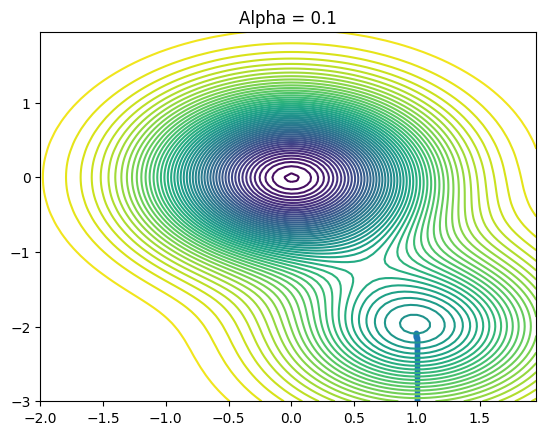

0.9979425748578128

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.15875428505868602), np.float64(0.3164086305066187))


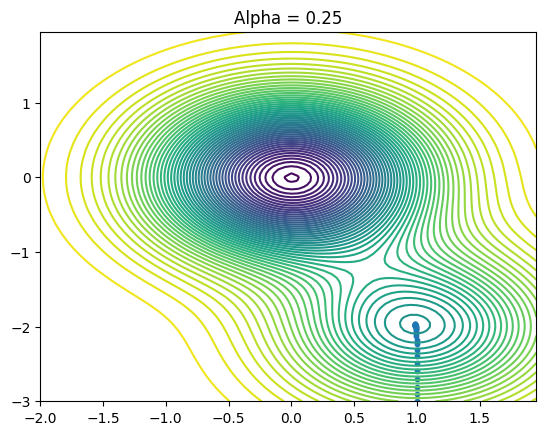

0.9927426562894148

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.10400685609389762), np.float64(0.20625380881058997))


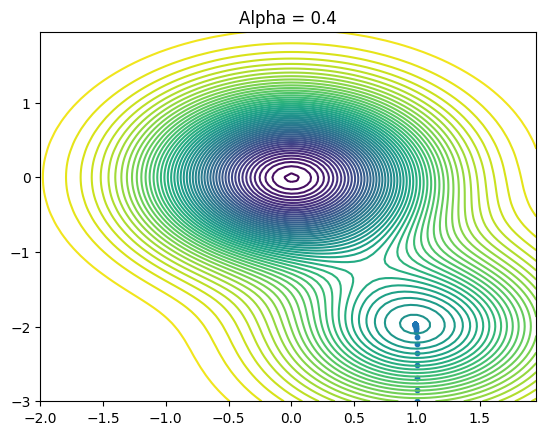

0.9927420920379082

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(0.049259427129109246), np.float64(0.09609898711456122))


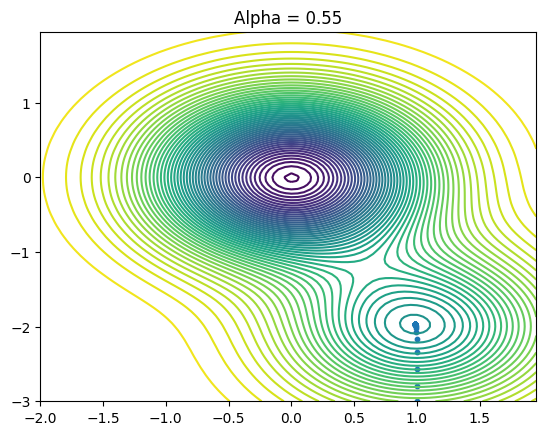

0.9927420920226762

0.7678344012479815
(np.float64(0.3649828597652559), np.float64(0.734365477973525))
(np.float64(-0.005488001835679157), np.float64(-0.01405583458146753))


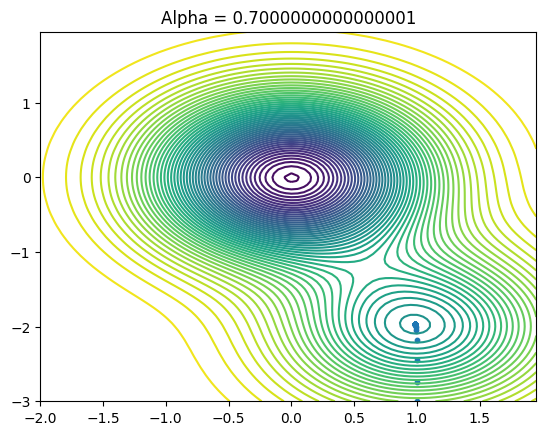

0.9927420920226762



In [6]:
def func2(X: float, Y: float) -> float:
    return 1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
def grad_func2(X: float, Y: float) -> Tuple[float, float]:
    return (2*X*np.exp(-(X**2 + Y**2)) + (X - 1)*np.exp(-((X - 1)**2 + (Y + 2)**2)), 2*Y*np.exp(-(X**2 + Y**2)) + (Y + 2)*np.exp(-((X - 1)**2 + (Y + 2)**2)))

j=0.1
for i in range(5):
    SGD2 = SimpleGradientDescent(func2, grad_func2, j)
    print(SGD2.calculate_func_value(0.25, 0.5))
    print(SGD2.calculate_func_grad(0.25, 0.5))
    print(SGD2.gradient_descent_step(0.25, 0.5))
    print(SGD2.minimize(1.5, 1, 30, 0, True))
    j+=0.15
    print()

j=0.1
for i in range(5):
    SGD2 = SimpleGradientDescent(func2, grad_func2, j)
    print(SGD2.calculate_func_value(0.25, 0.5))
    print(SGD2.calculate_func_grad(0.25, 0.5))
    print(SGD2.gradient_descent_step(0.25, 0.5))
    print(SGD2.minimize(1, -3, 30, 0, True))
    j+=0.15
    print()